<a href="https://colab.research.google.com/github/antoineelmallah/olx_colab/blob/main/estudo_olx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Retrieve advertising data

In [1]:
!pip install geobr

import geobr

import matplotlib.pyplot as plt
import pandas as pd
import io
#import plotly.express as px
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.4
    Uninstalling shapely-2.0.4:
      Successfully uninstalled shapely-2.0.4
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [2]:
from google.colab import files
uploaded = files.upload()

Saving olx_advertising.csv to olx_advertising.csv


In [3]:
dados = pd.read_csv(io.BytesIO(uploaded['olx_advertising.csv']), sep=';')
dados.head()

,id,code,creation_date,last_update_date,latitude,longitude,city,hp,gnv,year,...,model,brand,vehicle_type,fuel,gear,color,steering,first_price,last_price,accessories
0,2991,1291478992,2024-03-27 10:23:00.000,2024-05-28 06:43:09.000,-22.9251,-43.6799,Rio de Janeiro,1.0,1,2014,...,HYUNDAI HB20S COPA DO MUNDO 1.0 FLEX 12V MEC.,HYUNDAI,Sedã,Flex,Manual,Preto,Hidráulica,36000.0,36000.0,"Air bag, Alarme, Ar condicionado, Sensor de ré..."
1,2990,1291479353,2024-03-27 10:24:00.000,2024-05-28 06:43:09.000,-22.7899,-43.4597,Mesquita,NaN,1,2011,...,VOLKSWAGEN JETTA COMFORTLINE 2.0 T.FLEX 8V 4P...,VOLKSWAGEN,Sedã,Flex,Manual,Preto,Hidráulica,41900.0,41900.0,"Air bag, Alarme, Ar condicionado, Sensor de ré..."
2,2989,1291479466,2024-03-27 10:25:00.000,2024-05-28 06:43:09.000,-22.5198,-44.0790,Volta Redonda,1.0,0,2019,...,FORD KA 1.0 SE/SE PLUS TIVCT FLEX 5P,FORD,Sedã,Flex,Manual,Branco,Hidráulica,43900.0,43900.0,"Air bag, Alarme, Ar condicionado, Sensor de ré..."
3,2988,1291513059,2024-03-27 12:13:00.000,2024-05-28 06:43:09.000,-22.8156,-43.0411,São Gonçalo,1.5,1,2015,...,FORD KA SEL 1.5 16V FLEX 5P,FORD,Hatch,Flex,Manual,Vermelho,Elétrica,33000.0,33000.0,"Air bag, Alarme, Ar condicionado, Som, Trava e..."
4,2987,1291520428,2024-03-27 12:42:00.000,2024-05-28 06:43:09.000,-22.9983,-43.3655,Rio de Janeiro,1.8,0,2014,...,CHEVROLET COBALT LT 1.8 8V ECONO.FLEX 4P MEC.,CHEVROLET,Sedã,Flex,Manual,Prata,Hidráulica,30900.0,30900.0,"Air bag, Alarme, Ar condicionado, Câmera de ré..."


In [4]:
dados.dtypes

id                    int64
code                  int64
creation_date        object
last_update_date     object
latitude            float64
longitude           float64
city                 object
hp                  float64
gnv                   int64
year                  int64
mileage             float64
doors               float64
category             object
model                object
brand                object
vehicle_type         object
fuel                 object
gear                 object
color                object
steering             object
first_price         float64
last_price          float64
accessories          object
dtype: object

# 2. Pre-processing

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710 entries, 0 to 3709
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3710 non-null   int64  
 1   code              3710 non-null   int64  
 2   creation_date     3710 non-null   object 
 3   last_update_date  3710 non-null   object 
 4   latitude          3627 non-null   float64
 5   longitude         3627 non-null   float64
 6   city              3710 non-null   object 
 7   hp                3309 non-null   float64
 8   gnv               3710 non-null   int64  
 9   year              3710 non-null   int64  
 10  mileage           3710 non-null   float64
 11  doors             3375 non-null   float64
 12  category          3710 non-null   object 
 13  model             3710 non-null   object 
 14  brand             3710 non-null   object 
 15  vehicle_type      3710 non-null   object 
 16  fuel              3695 non-null   object 


In [6]:
dados.describe()

,id,code,latitude,longitude,hp,gnv,year,mileage,doors,first_price,last_price
count,3710.000000,3.710000e+03,3627.000000,3627.000000,3309.000000,3710.000000,3710.000000,3710.000000,3375.000000,3710.00000,3710.000000
mean,1855.500000,1.298636e+09,-22.750181,-43.206654,1.308855,0.300809,2015.481941,78977.719407,3.894519,40963.29973,40862.078706
std,1071.129077,3.487244e+07,0.310586,0.564827,0.299602,0.458671,3.440920,48981.614146,0.447097,5845.90837,5845.127485
min,1.000000,4.382880e+08,-28.745500,-50.752900,1.000000,0.000000,2000.000000,0.000000,2.000000,30000.00000,30000.000000
25%,928.250000,1.296588e+09,-22.917200,-43.459700,1.000000,0.000000,2013.000000,60000.000000,4.000000,36000.00000,36000.000000
50%,1855.500000,1.302328e+09,-22.859500,-43.320900,1.400000,0.000000,2015.000000,80000.000000,4.000000,41000.00000,40900.000000
75%,2782.750000,1.307095e+09,-22.686300,-43.104900,1.600000,1.000000,2018.000000,93226.250000,4.000000,45900.00000,45900.000000
max,3710.000000,1.310564e+09,-21.215100,-41.095500,1.800000,1.000000,2025.000000,940000.000000,4.000000,50000.00000,50000.000000


## 2.1. Split accessories into columns

In [7]:
# Split accessory into columns and removing accessories column
accessories = [ acc.split(', ') for acc in dados['accessories'] if type(acc) == str ]
accessories = set([ acc for acc_list in accessories for acc in acc_list ])
for accessory in accessories:
  dados[accessory] = dados['accessories'].str.contains(f'\, { accessory }, ', regex=True)

dados.drop(['accessories'], axis='columns', inplace=True)

dados.head(5)

,id,code,creation_date,last_update_date,latitude,longitude,city,hp,gnv,year,...,Som,Trava elétrica,Vidro elétrico,Câmera de ré,Conexão USB,Interface bluetooth,Air bag,Computador de bordo,Volante multifuncional,Ar condicionado
0,2991,1291478992,2024-03-27 10:23:00.000,2024-05-28 06:43:09.000,-22.9251,-43.6799,Rio de Janeiro,1.0,1,2014,...,True,True,False,False,False,False,False,False,False,True
1,2990,1291479353,2024-03-27 10:24:00.000,2024-05-28 06:43:09.000,-22.7899,-43.4597,Mesquita,NaN,1,2011,...,True,True,False,False,False,False,False,False,False,True
2,2989,1291479466,2024-03-27 10:25:00.000,2024-05-28 06:43:09.000,-22.5198,-44.0790,Volta Redonda,1.0,0,2019,...,True,True,False,False,False,False,False,False,False,True
3,2988,1291513059,2024-03-27 12:13:00.000,2024-05-28 06:43:09.000,-22.8156,-43.0411,São Gonçalo,1.5,1,2015,...,True,True,False,False,False,False,False,False,False,True
4,2987,1291520428,2024-03-27 12:42:00.000,2024-05-28 06:43:09.000,-22.9983,-43.3655,Rio de Janeiro,1.8,0,2014,...,True,True,False,True,False,False,False,False,False,True


## 2.2. Fill empty values

In [8]:
# Door field
# Extract door number from model field, if exists
dados['doors'].fillna(value=dados['model'].str.extract(r'^.*\s(\d)P\s.*$', expand=False).apply(lambda x : int(x) if not pd.isna(x) else None), inplace=True)
# Set mean for other empty values
door_mean = dados.describe()['doors']['mean']
dados['doors'].fillna(door_mean, inplace=True)

In [9]:
# HP field
# Extract hp number from model field, if exists
dados['hp'].fillna(value=dados['model'].str.extract(r'^.*\s(\d\.\d)\s.*$', expand=False).apply(lambda x : float(x) if not pd.isna(x) else None), inplace=True)
# Set mean for other empty values
door_mean = dados.describe()['hp']['mean']
dados['hp'].fillna(door_mean, inplace=True)

In [10]:
#def get_label_that_appear_in_text(text, labels, other):
#  for label in labels:
#    if label.lower() in text.lower():
#      return label
#  return other

In [11]:
# Accessories
for accessory in accessories:
  dados[accessory].fillna(False, inplace=True)

In [12]:
def fill_numeric_na_with_mean(dados: pd.DataFrame, field: str):
  dados[field].fillna(dados.describe()[field]['mean'], inplace=True)

In [13]:
# Fill empty numeric values with mean
fill_numeric_na_with_mean(dados, 'latitude')
fill_numeric_na_with_mean(dados, 'longitude')
fill_numeric_na_with_mean(dados, 'hp')

## 2.3. Format columns

In [14]:
# format date fields
dados['creation_date'] = pd.to_datetime(dados['creation_date'], format='%Y-%m-%d %H:%M:%S.%f').apply(lambda d : d.floor('D'))
dados['last_update_date'] = pd.to_datetime(dados['last_update_date'], format='%Y-%m-%d %H:%M:%S.%f').apply(lambda d : d.floor('D'))

In [15]:
last_processing_date = dados['last_update_date'].max().floor('D')
last_processing_date

Timestamp('2024-06-05 00:00:00')

In [16]:
# Create date related columns
dados['activated period'] = (dados['last_update_date'] - dados['creation_date']).dt.days
dados['closed'] = dados['last_update_date'] < last_processing_date

In [17]:
# Formatting model column
dados['model'] = dados['model'].str.split(f'\s').apply(lambda x : ' '.join(x[:2]))

In [18]:
def split_categoric_data_into_columns(dados: pd.DataFrame, field: str):
  columns = dados[dados[field].isna() == False][field].unique()
  result = pd.DataFrame(columns=columns)
  for column in columns:
    result[column] = dados[field] == column
  return result

In [19]:
# split_categoric_data_into_columns(dados, 'category')
df = pd.concat([dados,
    split_categoric_data_into_columns(dados, 'model'),
    split_categoric_data_into_columns(dados, 'brand'),
    split_categoric_data_into_columns(dados, 'vehicle_type'),
    split_categoric_data_into_columns(dados, 'fuel'),
    split_categoric_data_into_columns(dados, 'gear'),
    split_categoric_data_into_columns(dados, 'color'),
    split_categoric_data_into_columns(dados, 'steering')],
    axis='columns')
df.drop(columns=['model', 'brand', 'vehicle_type', 'fuel', 'gear', 'color', 'steering'], inplace=True)

In [20]:
# calculating price variation
df['price variation'] = df['last_price'] - df['first_price']
df.drop(columns=['first_price', 'last_price'], inplace=True)

<ipython-input-20-cb8f80921915>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['price variation'] = df['last_price'] - df['first_price']


## 2.4. Removing not closed advertising

In [21]:
threshold = 5
df = df[(df['closed'] == True) | (df['activated period'] > threshold)]
df.reset_index(drop=True, inplace=True)
df.head(5)

,id,code,creation_date,last_update_date,latitude,longitude,city,hp,gnv,year,...,Azul,Verde,Laranja,Amarelo,Hidráulica,Elétrica,5,Mecânica,Assistida,price variation
0,2991,1291478992,2024-03-27,2024-05-28,-22.9251,-43.6799,Rio de Janeiro,1.0,1,2014,...,False,False,False,False,True,False,False,False,False,0.0
1,2990,1291479353,2024-03-27,2024-05-28,-22.7899,-43.4597,Mesquita,2.0,1,2011,...,False,False,False,False,True,False,False,False,False,0.0
2,2989,1291479466,2024-03-27,2024-05-28,-22.5198,-44.0790,Volta Redonda,1.0,0,2019,...,False,False,False,False,True,False,False,False,False,0.0
3,2988,1291513059,2024-03-27,2024-05-28,-22.8156,-43.0411,São Gonçalo,1.5,1,2015,...,False,False,False,False,False,True,False,False,False,0.0
4,2987,1291520428,2024-03-27,2024-05-28,-22.9983,-43.3655,Rio de Janeiro,1.8,0,2014,...,False,False,False,False,True,False,False,False,False,0.0


In [22]:
df.shape

(3325, 257)

## 2.5. Removing unused columns

In [23]:
for col in df.columns:
  print(col)

id
code
creation_date
last_update_date
latitude
longitude
city
hp
gnv
year
mileage
doors
category
Blindado
Rodas de liga leve
Alarme
Bancos de couro
Controle automático de velocidade
Navegador GPS
Sensor de ré
Som
Trava elétrica
Vidro elétrico
Câmera de ré
Conexão USB
Interface bluetooth
Air bag
Computador de bordo
Volante multifuncional
Ar condicionado
activated period
closed
HYUNDAI HB20S
VOLKSWAGEN JETTA
FORD KA
CHEVROLET COBALT
VOLKSWAGEN SAVEIRO
FIAT PALIO
FIAT MOBI
CHEVROLET PRISMA
CHEVROLET SPIN
VOLKSWAGEN GOL
RENAULT LOGAN
KIA MOTORS
RENAULT SANDERO
FIAT 500
FIAT UNO
RENAULT KWID
PEUGEOT 308
HYUNDAI HB20
VOLKSWAGEN FOX
RENAULT DUSTER
FIAT FREEMONT
FORD FOCUS
TOYOTA ETIOS
CHEVROLET ONIX
CHEVROLET VECTRA
FORD FIESTA
FORD ECOSPORT
FIAT BRAVO
VOLKSWAGEN VOYAGE
CHEVROLET MONTANA
VOLKSWAGEN UP!
CHEVROLET CRUZE
CHEVROLET ASTRA
VOLKSWAGEN CROSSFOX
CHEVROLET SONIC
PEUGEOT 208
NISSAN VERSA
HONDA CITY
HYUNDAI VERACRUZ
FORD KA+
NISSAN MARCH
FIAT GRAND
FIAT ARGO
FIAT IDEA
FORD FUSION
VOLVO 

## 3. Random forest

In [24]:
# Verification after pre-processing
df.describe()

,id,code,creation_date,last_update_date,latitude,longitude,hp,gnv,year,mileage,doors,activated period,price variation
count,3325.000000,3.325000e+03,3325,3325,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000
mean,1666.642707,1.297488e+09,2024-05-04 18:01:50.436090112,2024-06-03 21:18:27.609022720,-22.747719,-43.208168,1.406312,0.305564,2015.476692,79029.344962,3.923400,30.136541,-107.584962
min,1.000000,4.382880e+08,2024-03-27 00:00:00,2024-05-28 00:00:00,-23.148400,-44.706200,1.000000,0.000000,2000.000000,0.000000,2.000000,0.000000,-12100.000000
25%,832.000000,1.296096e+09,2024-04-19 00:00:00,2024-06-05 00:00:00,-22.917200,-43.459700,1.000000,0.000000,2013.000000,60000.000000,4.000000,13.000000,0.000000
50%,1663.000000,1.301347e+09,2024-05-08 00:00:00,2024-06-05 00:00:00,-22.851000,-43.312800,1.400000,0.000000,2015.000000,80000.000000,4.000000,28.000000,0.000000
75%,2494.000000,1.305863e+09,2024-05-22 00:00:00,2024-06-05 00:00:00,-22.686300,-43.116700,1.600000,1.000000,2018.000000,93235.000000,4.000000,46.000000,0.000000
max,3710.000000,1.310255e+09,2024-06-04 00:00:00,2024-06-05 00:00:00,-21.215100,-41.095500,5.700000,1.000000,2025.000000,940000.000000,5.000000,66.000000,10000.000000
std,966.630812,3.657666e+07,NaN,NaN,0.289267,0.543904,0.435261,0.460715,3.447799,48156.498194,0.446952,18.655871,802.863913


In [25]:
y = df['activated period'] <= threshold

In [26]:
columns_to_keep = [ column for column in df.columns if column not in {
    'id',
    'code',
    'category',
    'creation_date',
    'last_update_date',
    'city'} ]
X = df[columns_to_keep]

In [27]:
# Split train and test data
from sklearn.model_selection import train_test_split

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, # numero de árvores de decisão (default=100)
                             max_depth=15, # número de níveis máximo que cada árvore de decisão deve ter
                             random_state=SEED)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


** Analise do modelo
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       642
        True       1.00      0.87      0.93        23

    accuracy                           1.00       665
   macro avg       1.00      0.93      0.96       665
weighted avg       1.00      1.00      1.00       665



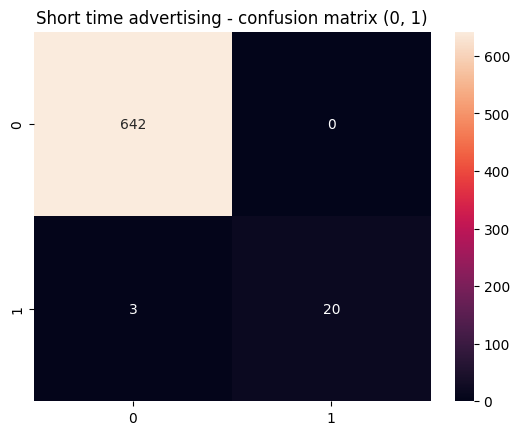

In [29]:
import seaborn as sns

print('\n** Analise do modelo')
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Short time advertising - confusion matrix (0, 1)')
print(classification_report(y_test,y_pred))


In [30]:
# Carros mais anunciados
dados[['model', 'year', 'id']]\
  .groupby(by=['model', 'year'])\
  .count()\
  .sort_values(by='id', ascending=False)\
  .head(10)

id
model          year    
FORD KA        2018  85
               2019  78
               2020  53
HYUNDAI HB20   2015  49
FORD KA        2015  42
HYUNDAI HB20   2014  42
CHEVROLET ONIX 2018  41
               2016  41
HYUNDAI HB20   2017  39
RENAULT KWID   2019  38

In [31]:
# Carros mais vendidos
dados[(dados['closed']) | (dados['last_update_date'] < last_processing_date)][['model', 'year', 'id']]\
  .groupby(by=['model', 'year'])\
  .count()\
  .sort_values(by='id', ascending=False)\
  .head(10)

id
model         year    
FORD KA       2019  21
RENAULT KWID  2019  13
HYUNDAI HB20  2017  12
FORD KA       2018  12
              2020  10
              2015  10
HYUNDAI HB20  2014   9
FIAT MOBI     2023   9
CITROEN C3    2015   9
RENAULT LOGAN 2020   8

In [32]:
# Carros com maior variação de preço no anuncio
dados['price_variation'] = dados['last_price'] - dados['first_price']
dados[['model', 'year', 'first_price', 'price_variation']]\
  .groupby(by=['model', 'year'])\
  .mean()\
  .sort_values(by='price_variation', ascending=False)\
  .head(10)

,,first_price,price_variation
model,year,,
FIAT BRAVO,2013,33950.000000,4000.0
CHEVROLET CAPTIVA,2014,39800.000000,3000.0
VOLKSWAGEN SPACEFOX,2018,44933.333333,3000.0
DODGE JOURNEY,2015,45000.000000,2900.0
BMW X3,2006,38950.000000,2500.0
CHEVROLET S10,2001,35000.000000,2500.0
VOLKSWAGEN SAVEIRO,2017,44250.000000,2000.0
FIAT SIENA,2014,33474.750000,1750.0
CHEVROLET SONIC,2012,32350.000000,1225.0


In [33]:
all_muni = geobr.read_municipality(code_muni="RJ", year=2022)

dados_per_city = dados[['city', 'price_variation']].groupby(by='city').mean().reset_index()

all_muni['name_muni'] = all_muni['name_muni'].str.lower()
dados_per_city['city'] = dados_per_city['city'].str.lower()

all_muni = all_muni.merge(dados_per_city, how='left', left_on='name_muni', right_on='city')

(-45.085889585, -40.761371915, -23.485867664999997, -20.913283035)

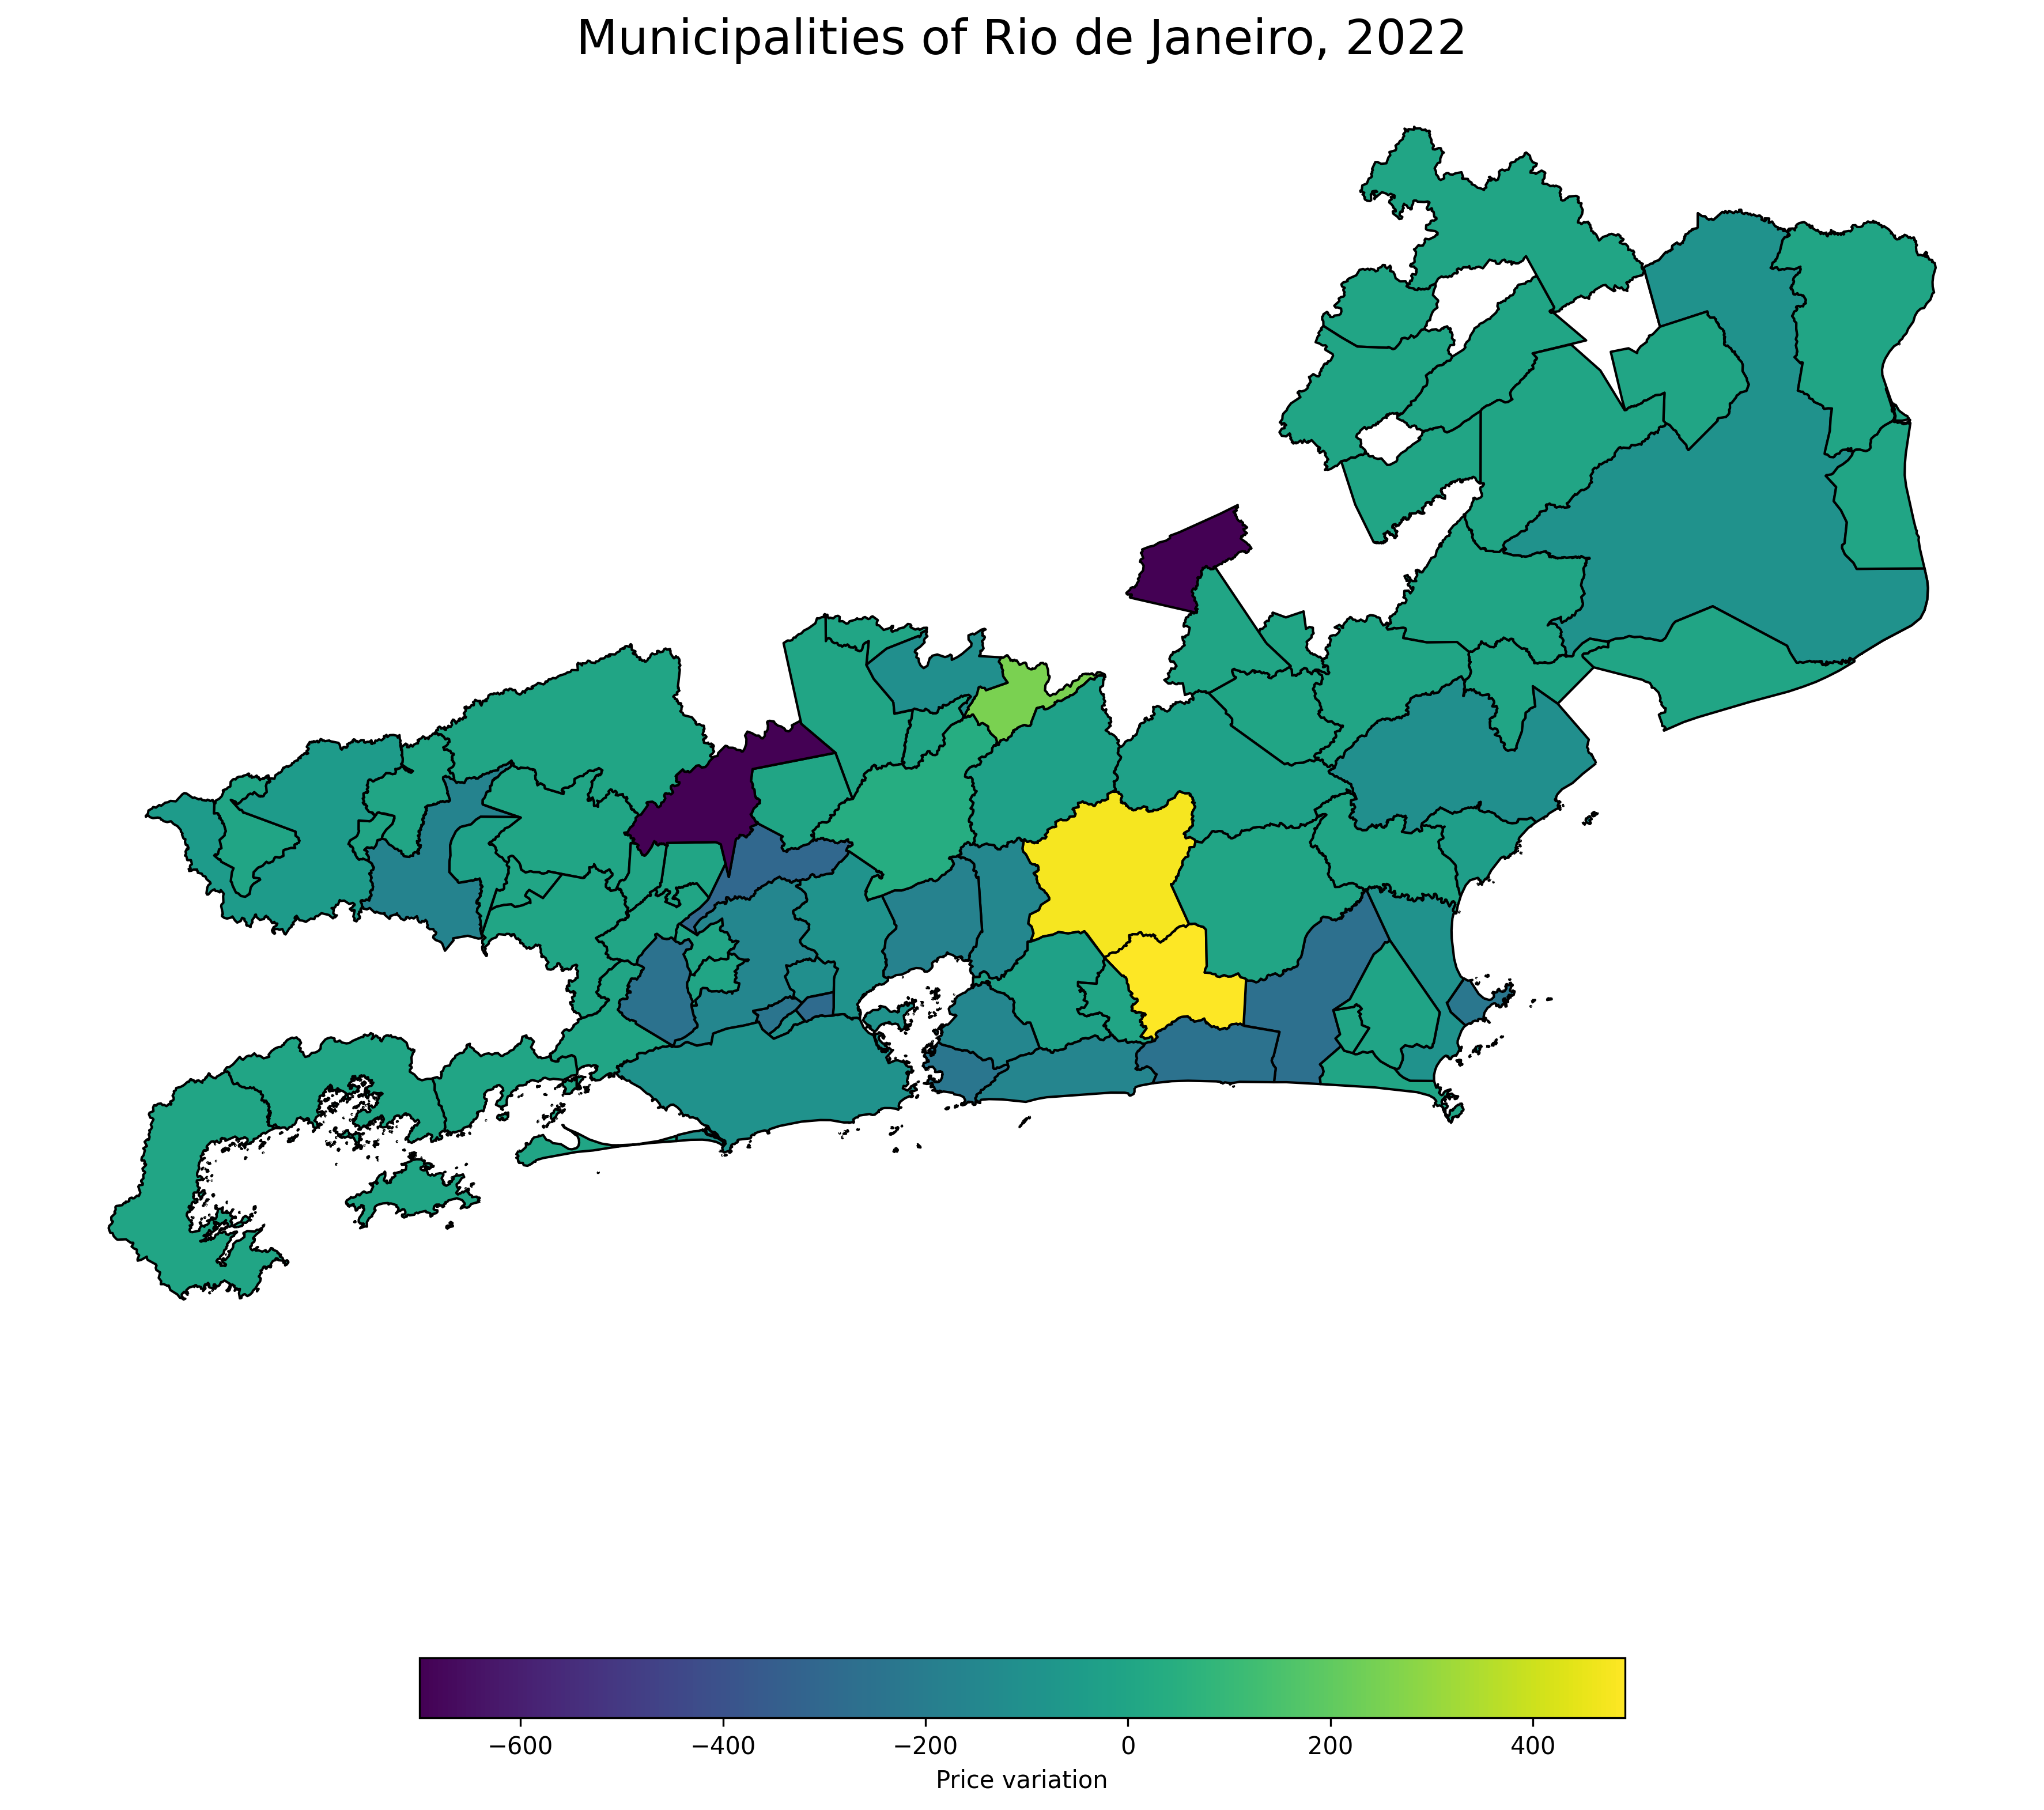

In [40]:
#all_muni = geobr.read_municipality(code_muni="RJ", year=2010)

#all_muni['name_muni'] = all_muni['name_muni'].str.lower()
#dados['city'] = dados['city'].str.lower()

#all_muni = all_muni.merge(dados, how='left', left_on='name_muni', right_on='city')

fig, ax = plt.subplots(figsize=(15, 15), dpi=300)

all_muni.plot(
    column='price_variation',
    #facecolor="#2D3E50",
    edgecolor="#000000",
    cmap="viridis",
    legend=True,
    legend_kwds={
        "label": "Price variation",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax)

ax.set_title("Municipalities of Rio de Janeiro, 2022", fontsize=20)
ax.axis("off")